In [2]:
!pip install transformers datasets rouge-score bert-score sacrebleu matplotlib seaborn gradio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.5 MB/s eta 0:00:00
   ━━

#Importing libraries

In [3]:

from datasets import load_dataset
from transformers import pipeline
import matplotlib.pyplot as plt
import gradio as gr
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from sacrebleu import corpus_bleu

dataset = load_dataset("cnn_dailymail", '3.0.0')



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

#setting up huggingface pipelines

In [4]:
bart_pipeline = pipeline("summarization", model="JordiAb/BART_news_summarizer")
t5_pipeline = pipeline("summarization", model="t5-small", tokenizer="t5-small")
distilbart_pipeline = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")



config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

#Testing one sample

In [5]:
sample_text = dataset['test'][0]['article']
reference = dataset['test'][0]['highlights']

bart_summary = bart_pipeline(sample_text)
t5_summary = t5_pipeline(sample_text)
distilbart_summary = distilbart_pipeline(sample_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (789 > 512). Running this sequence through the model will result in indexing errors


#Setting up eval metrics for summarization

In [6]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Compute ROUGE scores
rouge_scores_bart = scorer.score(reference, bart_summary[0]['summary_text'])
rouge_scores_t5 = scorer.score(reference, t5_summary[0]['summary_text'])
rouge_scores_distilbart = scorer.score(reference, distilbart_summary[0]['summary_text'])



In [7]:
# Compute BERTScore
_, _, f_bart = bert_score([bart_summary[0]['summary_text']], [reference], lang="en")
_, _, f_t5 = bert_score([t5_summary[0]['summary_text']], [reference], lang="en")
_, _, f_distilbart = bert_score([distilbart_summary[0]['summary_text']], [reference], lang="en")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
P, R, F = bert_score([bart_summary[0]['summary_text'], t5_summary[0]['summary_text'], distilbart_summary[0]['summary_text']], [reference, reference, reference], lang="en")
#converting tensors to scalars
f_bart = F[0].item()
f_t5 = F[1].item()
f_distilbart = F[2].item()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
#Bleu Score
bleu_bart = corpus_bleu([bart_summary[0]['summary_text']], [[reference]]).score
bleu_t5 = corpus_bleu([t5_summary[0]['summary_text']], [[reference]]).score
bleu_distilbart = corpus_bleu([distilbart_summary[0]['summary_text']], [[reference]]).score



In [10]:
def plot_results(scores, metric_name, model_names):
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, scores)
    plt.title(f'Comparison of {metric_name}')
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.show()


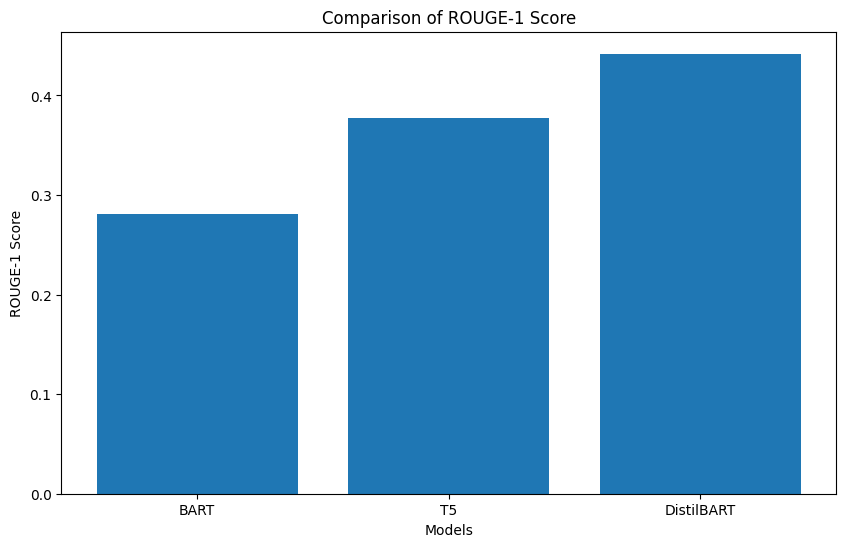

In [11]:
rouge1_scores = [rouge_scores_bart['rouge1'].fmeasure, rouge_scores_t5['rouge1'].fmeasure, rouge_scores_distilbart['rouge1'].fmeasure]
plot_results(rouge1_scores, 'ROUGE-1 Score', ['BART', 'T5', 'DistilBART'])

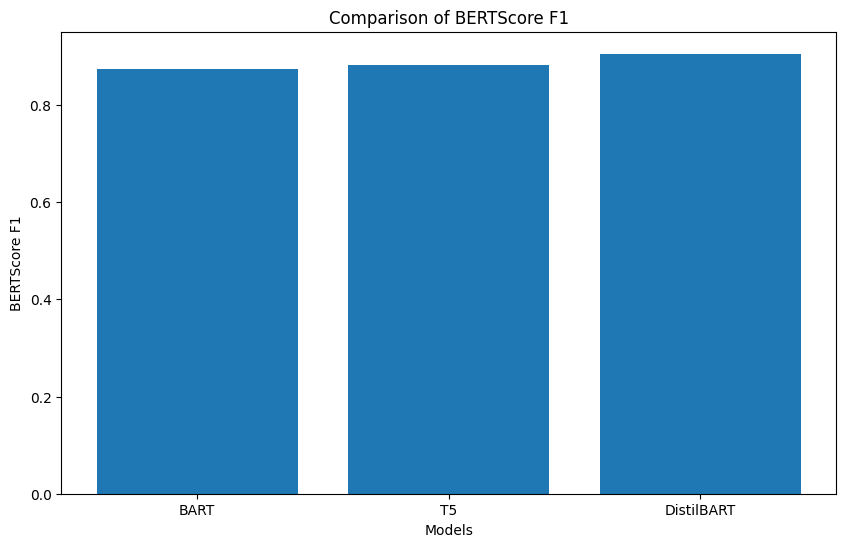

In [12]:
bert_scores = [f_bart, f_t5, f_distilbart]
plot_results(bert_scores, 'BERTScore F1', ['BART', 'T5', 'DistilBART'])

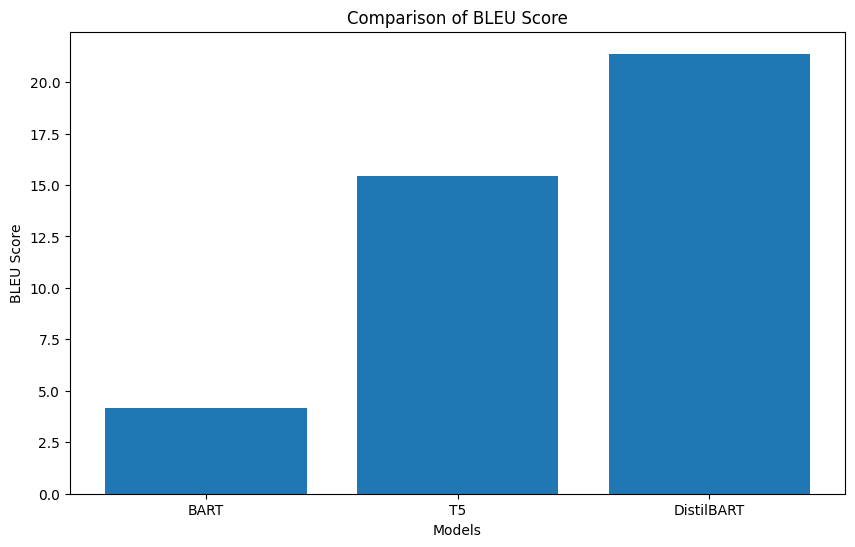

In [13]:
bleu_scores = [bleu_bart, bleu_t5, bleu_distilbart]
plot_results(bleu_scores, 'BLEU Score', ['BART', 'T5', 'DistilBART'])

#Aggregate score for 10 inferences on each model

In [15]:
import pandas as pd
results = []
for i in range(10):
    sample_text = dataset['test'][i]['article']
    reference = dataset['test'][i]['highlights']

    bart_summary = bart_pipeline(sample_text)[0]['summary_text']
    t5_summary = t5_pipeline(sample_text)[0]['summary_text']
    distilbart_summary = distilbart_pipeline(sample_text)[0]['summary_text']

    rouge_scores_bart = scorer.score(reference, bart_summary)
    rouge_scores_t5 = scorer.score(reference, t5_summary)
    rouge_scores_distilbart = scorer.score(reference, distilbart_summary)

    _, _, f_bart = bert_score([bart_summary], [reference], lang="en")
    _, _, f_t5 = bert_score([t5_summary], [reference], lang="en")
    _, _, f_distilbart = bert_score([distilbart_summary], [reference], lang="en")

    f_bart = f_bart[0].item()
    f_t5 = f_t5[0].item()
    f_distilbart = f_distilbart[0].item()

    bleu_bart = corpus_bleu([bart_summary], [[reference]]).score
    bleu_t5 = corpus_bleu([t5_summary], [[reference]]).score
    bleu_distilbart = corpus_bleu([distilbart_summary], [[reference]]).score

    results.append({
        'Model': 'BART',
        'ROUGE-1': rouge_scores_bart['rouge1'].fmeasure,
        'ROUGE-2': rouge_scores_bart['rouge2'].fmeasure,
        'ROUGE-L': rouge_scores_bart['rougeL'].fmeasure,
        'BERTScore F1': f_bart,
        'BLEU': bleu_bart
    })
    results.append({
        'Model': 'T5',
        'ROUGE-1': rouge_scores_t5['rouge1'].fmeasure,
        'ROUGE-2': rouge_scores_t5['rouge2'].fmeasure,
        'ROUGE-L': rouge_scores_t5['rougeL'].fmeasure,
        'BERTScore F1': f_t5,
        'BLEU': bleu_t5
    })
    results.append({
        'Model': 'DistilBART',
        'ROUGE-1': rouge_scores_distilbart['rouge1'].fmeasure,
        'ROUGE-2': rouge_scores_distilbart['rouge2'].fmeasure,
        'ROUGE-L': rouge_scores_distilbart['rougeL'].fmeasure,
        'BERTScore F1': f_distilbart,
        'BLEU': bleu_distilbart
    })
df_results = pd.DataFrame(results)
print(df_results)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

         Model   ROUGE-1   ROUGE-2   ROUGE-L  BERTScore F1       BLEU
0         BART  0.280992  0.134454  0.231405      0.873376   4.171603
1           T5  0.376812  0.179104  0.347826      0.882003  15.444582
2   DistilBART  0.441860  0.309524  0.395349      0.905635  21.377724
3         BART  0.400000  0.167832  0.317241      0.877830  11.880892
4           T5  0.444444  0.075949  0.271605      0.865421   4.309128
5   DistilBART  0.509804  0.200000  0.411765      0.884053  15.674373
6         BART  0.375940  0.259542  0.285714      0.872753  14.479495
7           T5  0.363636  0.106667  0.259740      0.857182   4.706246
8   DistilBART  0.266667  0.136364  0.200000      0.870823   8.158447
9         BART  0.333333  0.015385  0.196970      0.867176   1.392768
10          T5  0.256410  0.000000  0.153846      0.865013   1.505212
11  DistilBART  0.369565  0.133333  0.282609      0.881737  11.025109
12        BART  0.505747  0.188235  0.229885      0.897766   8.843827
13          T5  0.61

#Average score

In [16]:
average_scores = df_results.groupby('Model').mean().reset_index()
print(average_scores)


        Model   ROUGE-1   ROUGE-2   ROUGE-L  BERTScore F1       BLEU
0        BART  0.358670  0.157135  0.249807      0.880191   8.490011
1  DistilBART  0.369322  0.163126  0.269362      0.882123  10.897043
2          T5  0.400823  0.163381  0.271363      0.879326   9.363944


#Testing BART

In [17]:
import gradio as gr

def summarize(text, model_name):
    if model_name == 'BART':
        summary = bart_pipeline(text)[0]['summary_text']
    elif model_name == 'T5':
        summary = t5_pipeline(text)[0]['summary_text']
    elif model_name == 'DistilBART':
        summary = distilbart_pipeline(text)[0]['summary_text']
    else:
        summary = "Model not recognized"
    return summary

model_dropdown = gr.Dropdown(choices=['BART', 'T5', 'DistilBART'], label="Choose Model")

iface = gr.Interface(fn=summarize,
                     inputs=["text", model_dropdown],
                     outputs="text",
                     title="Text Summarization",
                     description="Select a model and enter text to summarize. Choose from BART, T5, or DistilBART models.")

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://76dbeeaa8d66197011.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Testing T5

In [18]:
iface.launch()


Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://76dbeeaa8d66197011.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Testing DistilBART

In [19]:
iface.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://76dbeeaa8d66197011.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
